# Network-Analysis-for-Information-Retrieval

## Data 

In [1]:
import pandas as pd

FILE_PREFIX = "dblp-ref-"
NB_FILES = 4

corpus = []

# for i in range(0, NB_FILES):
file = './data/' + FILE_PREFIX + '3' + ".json"
data = pd.read_json(file, lines=True)
corpus.append(data)

corpus = pd.concat(corpus, ignore_index=True)

C:\Users\mdousse1\AppData\Local\Temp\ipykernel_7944\3941423233.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
corpus.shape

(79007, 8)

----- Abstracts -----
Mean length of Abstracts 1060.5378252168111
Max length of Abstracts 7139.0
Min length of Abstracts 60.0


----- Authors -----
Number of authors 282514
Number of unique authors 178268
Mean number of authors per paper 1.5847712432966097
Number of paper per author : authors
Wei Wang                92
Yang Yang               54
Mohamed-Slim Alouini    53
Jun Wang                52
Wei Zhang               52
                        ..
Patrice Koehl            1
Saghi Nojoomi            1
Wataru Noguchi           1
Atulan Zaman             1
Eirik Abildsnes          1
Name: count, Length: 178268, dtype: int64


----- Temporal distribution -----


<Axes: >

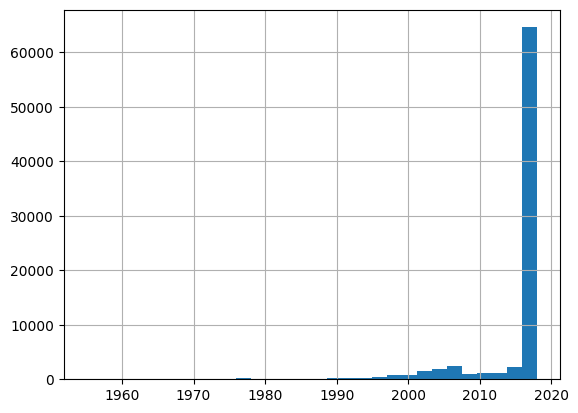

In [3]:
print("----- Abstracts -----")
print("Mean length of Abstracts", corpus['abstract'].str.len().mean())
print("Max length of Abstracts", corpus['abstract'].str.len().max())
print("Min length of Abstracts", corpus['abstract'].str.len().min())

print("\n")
print("----- Authors -----")
df_exploded = corpus.explode('authors')
print("Number of authors", len(df_exploded['authors']))
unique_authors = df_exploded['authors'].unique().tolist()
print("Number of unique authors", len(unique_authors))
print("Mean number of authors per paper", df_exploded['authors'].value_counts().mean())
print("Number of paper per author :", df_exploded['authors'].value_counts())

## temporal distribution
print("\n")
print("----- Temporal distribution -----")
corpus['year'].hist(bins=30)

## Networks

In [4]:
import mpld3
import itertools
import networkx as nx
import matplotlib.pyplot as plt

NB_NODES = 2000

### Authorship Network

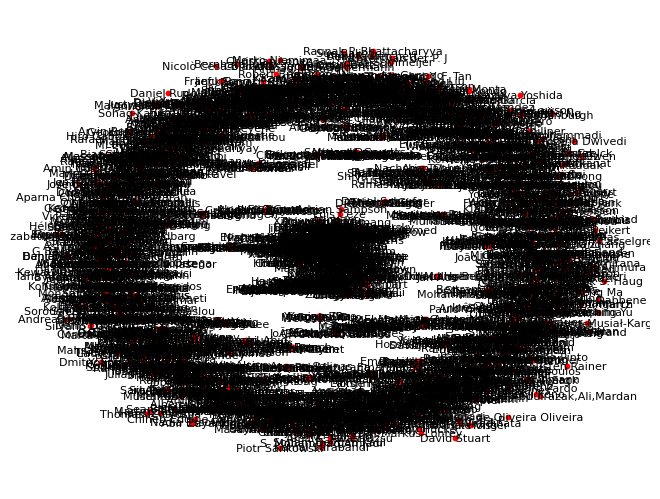

In [5]:
mpld3.enable_notebook()

G = nx.Graph()

for authors_list in corpus['authors']:
    G.add_nodes_from(authors_list)
    G.add_edges_from(itertools.combinations(authors_list, 2))

nodes_to_keep = list(G.nodes())[:NB_NODES]
G_filtered = G.subgraph(nodes_to_keep)

pos = nx.spring_layout(G_filtered)
nx.draw(G_filtered, pos, with_labels=True, node_size=10, node_color='red', font_size=8)

import matplotlib.pyplot as plt
plt.show()

mpld3.disable_notebook()

#### Statistical Analysis

In [6]:
print("Number of connected components : ", nx.number_connected_components(G_filtered))
print("Density : ", round(nx.density(G_filtered), 2))
print("Average clustering : ", round(nx.average_clustering(G_filtered), 2))
print("Transitivity : ", round(nx.transitivity(G_filtered), 2))
print("Number of nodes : ", G_filtered.number_of_nodes())
print("Number of edges : ", G_filtered.number_of_edges())

Number of connected components :  497
Density :  0.0
Average clustering :  0.82
Transitivity :  0.93
Number of nodes :  2000
Number of edges :  3319


#### Degree Distribution

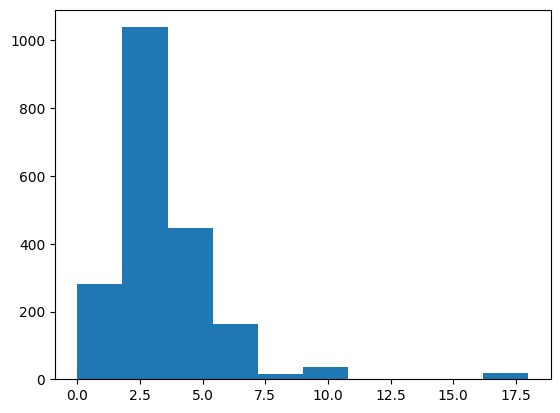

In [7]:
G_filtered.degree()
d_degree = dict(G_filtered.degree())
n, bins, patches = plt.hist(d_degree.values())
plt.show()


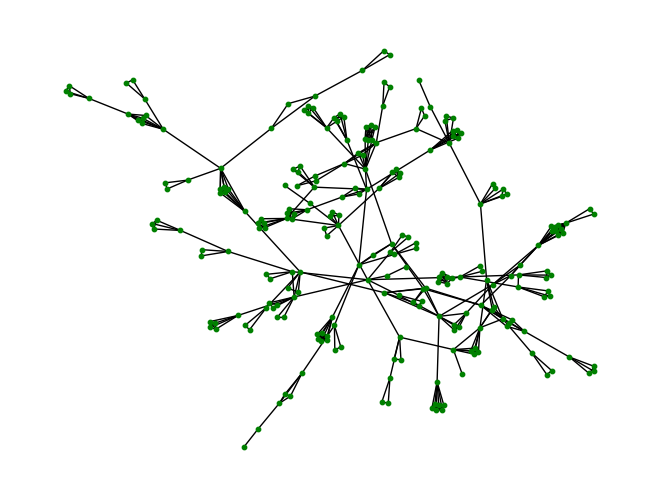

In [8]:
g_sorted = sorted(nx.connected_components(G_filtered), key=len, reverse=True)

g = G_filtered.subgraph(g_sorted[0])
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color='green', font_size=8)
plt.show()

#### Centrality Measures

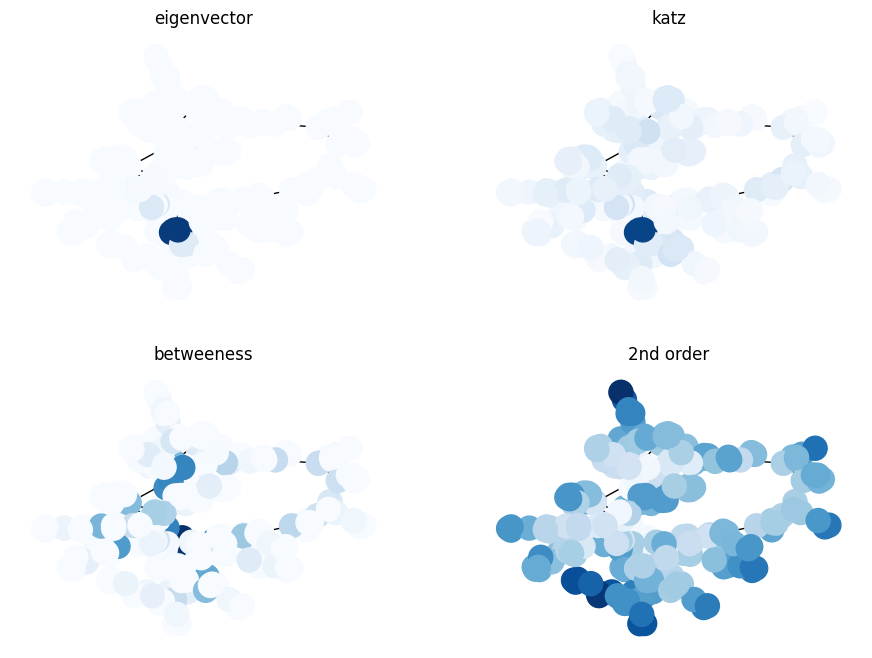

In [9]:
centralities = [nx.eigenvector_centrality, nx.katz_centrality, nx.betweenness_centrality, nx.second_order_centrality]
centralities_names = ["eigenvector", "katz", "betweeness", "2nd order"]
val_cent = []

for c in centralities:
    val_cent.append(c(g))

my_pos = nx.spring_layout(g)

figure = plt.figure(figsize=(11, 8))
for i in range(len(centralities)):
    figure.add_subplot(2, 2, i+1)
    plt.title(centralities_names[i])
    nx.draw(g, pos = my_pos, with_labels=False, node_color=[*val_cent[i].values()], cmap=plt.cm.Blues)
plt.show()

### Document Network

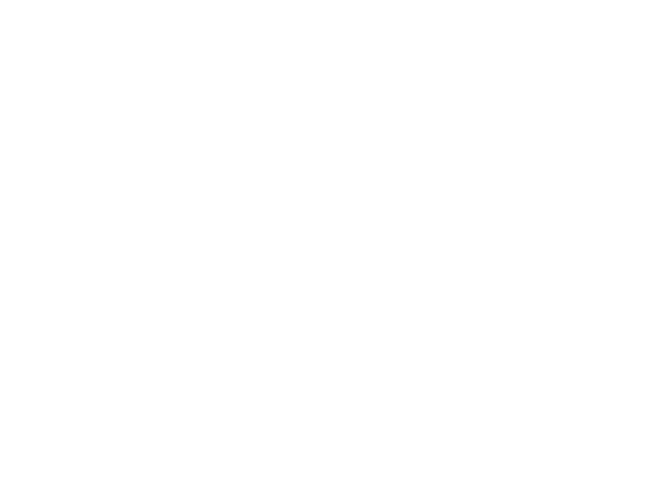

In [12]:
G = nx.Graph()
NB_NODES = 1000

if type(corpus['references']) == list:
    for documents_list in corpus['references']:
        if documents_list:
            G.add_nodes_from(documents_list)
            G.add_edges_from(itertools.combinations(documents_list, 2))

nodes_to_keep = list(G.nodes())[:NB_NODES]
G_filtered = G.subgraph(nodes_to_keep)

pos = nx.spring_layout(G_filtered)
nx.draw(G_filtered, pos, with_labels=False, node_size=8, node_color='lightblue', font_size=8)

plt.show()

#### Statistical Analysis

In [11]:
print("Number of connected components : ", nx.number_connected_components(G_filtered))
print("Density : ", round(nx.density(G_filtered), 2))
print("Average clustering : ", round(nx.average_clustering(G_filtered), 2))
print("Transitivity : ", round(nx.transitivity(G_filtered), 2))
print("Number of nodes : ", G_filtered.number_of_nodes())
print("Number of edges : ", G_filtered.number_of_edges())

Number of connected components :  0
Density :  0


ZeroDivisionError: division by zero

#### Degree Distribution

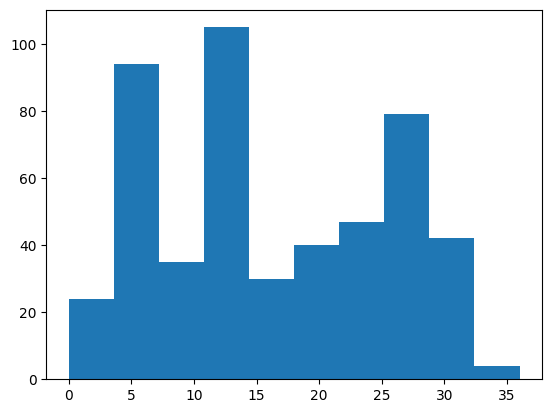

In [ ]:
G_filtered.degree()
d_degree = dict(G_filtered.degree())
n, bins, patches = plt.hist(d_degree.values())
plt.show()

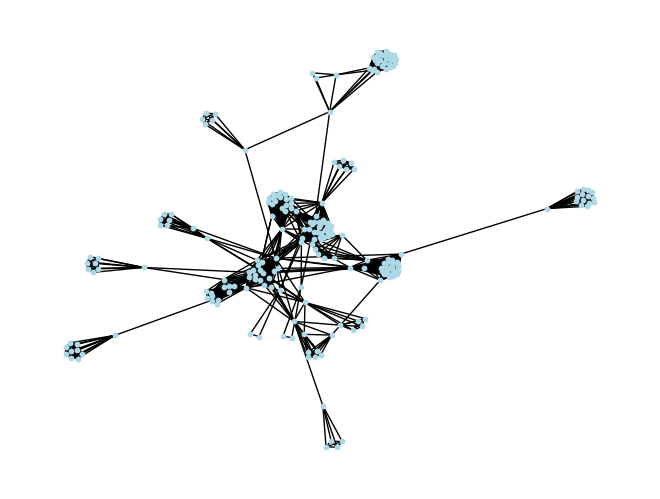

In [ ]:
# extract the largest connected component
g_sorted = sorted(nx.connected_components(G_filtered), key=len, reverse=True)

g = G_filtered.subgraph(g_sorted[0])
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=10, node_color='lightblue', font_size=8)
plt.show()

#### Centrality Measures

In [ ]:
centralities = [nx.eigenvector_centrality, nx.katz_centrality, nx.betweenness_centrality, nx.second_order_centrality]
centralities_names = ["eigenvector", "katz", "betweeness", "2nd order"]
val_cent = []

for c in centralities:
    val_cent.append(c(g))

my_pos = nx.spring_layout(g)

figure = plt.figure(figsize=(11, 8))
for i in range(len(centralities)):
    figure.add_subplot(2, 2, i+1)
    plt.title(centralities_names[i])
    nx.draw(g, pos = my_pos, with_labels=False, node_color=[*val_cent[i].values()], cmap=plt.cm.Blues)
plt.show()

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

## Search Engine

### Preprocessing

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdousse1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdousse1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mdousse1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
## count NAN abstract
print("Number of NAN abstracts", corpus['abstract'].isna().sum())

## remove NAN abstracts
corpus = corpus.dropna(subset=['abstract'])

Number of NAN abstracts 34037


In [15]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

corpus['abstract'] = corpus['abstract'].apply(preprocess)

### Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus['abstract'])
features_hp = vectorizer.get_feature_names_out()

In [17]:
from scipy.sparse import find, csr_matrix
import pandas as pd

# des options permettent de limiter (ou non) le nombre de lignes/colonnes affichées
# par exemple :
# pd.set_option('display.max_rows', None)

# cette fonction permet d'afficher une "jolie" représentation du vecteur v
# ARGS :
#   v : le vecteur à afficher (par ex. une ligne de la matrice X)
#   features : le vocabulaire
#   top_n : le nombre de mots maximum à afficher
def print_feats(v, features, top_n = 30):
    _, ids, values = find(v)
    feats = [(ids[i], values[i], features[ids[i]]) for i in range(len(list(ids)))]
    top_feats = sorted(feats, key=lambda x: x[1], reverse=True)[0:top_n]
    return pd.DataFrame({"word" : [t[2] for t in top_feats], "value": [t[1] for t in top_feats]})  

In [18]:
n_docs, n_terms = X.shape

# on fait la somme sur toutes les lignes pour chacun des mots
tf_sum = X.sum(axis=0)
tf_sum = tf_sum.tolist()[0] # conversion en liste

print_feats(tf_sum, features_hp)

,word,value
0,use,46895
1,propos,37034
2,model,32944
3,system,32247
4,data,30924
5,method,29521
6,paper,28360
7,result,27070
8,algorithm,24702
9,network,24259


In [19]:
from scipy.linalg import norm

# fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
        # numérateur : <i.j>
    num = i.dot(j.transpose())[0,0]
        # dénominateur : ||i||_2 * ||j||_2
    den = norm(i.todense()) * norm(j.todense())
    if (den>0): # on vérifie que le dénominateur n'est pas nul
        return (num/den)
    else:
        return 0

In [20]:
print(print_feats(X[5], features_hp, top_n=40))
print('----------------------------------------')
print(print_feats(X[10], features_hp, top_n=40))

          word  value
0         text      6
1      contain      5
2     recognit      5
3       result      3
4         code      2
5       detect      2
6    dimension      2
7      identif      2
8       propos      2
9         rate      2
10      achiev      1
11       addit      1
12     automat      1
13  background      1
14        base      1
15        bodi      1
16    challeng      1
17       color      1
18      compon      1
19     connect      1
20     coverag      1
21    demonstr      1
22       error      1
23        even      1
24  experiment      1
25        form      1
26     generat      1
27      global      1
28        high      1
29        make      1
30      manual      1
31     multipl      1
32     network      1
33        oper      1
34      orient      1
35  outperform      1
36     paramet      1
37     pattern      1
38     perform      1
39     problem      1
----------------------------------------
             word  value
0        approach      3
1      

In [21]:
similarity_5_10 = round(cosinus(X[5], X[10]) * 100,2)
print("Similarity between 5 and 10 : ", similarity_5_10, "%")

Similarity between 5 and 10 :  4.02 %


## Clustering

## Classification

In [22]:
import numpy as np

corpus['venue'].replace('', np.nan, inplace=True)
corpus = corpus.dropna(subset=['venue'])

stop_words_venues = [
    "applied",
    "arxiv",
    "conference",
    "information",
    "international",
    "journal",
    "knowledge",
    "research",
    "symposium",
    "acm",
    "advances",
    "lectures",
    "notes",
    "note"
]

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if t not in stop_words_venues]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

corpus['venue'] = corpus['venue'].apply(preprocess)
    
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus['venue'])
features_venues = vectorizer.get_feature_names_out()

n_docs, n_terms = X.shape

# on fait la somme sur toutes les lignes pour chacun des mots
tf_sum = X.sum(axis=0)
tf_sum = tf_sum.tolist()[0] # conversion en liste

print_feats(tf_sum, features_venues)

C:\Users\mdousse1\AppData\Local\Temp\ipykernel_7944\3945182215.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corpus['venue'].replace('', np.nan, inplace=True)


,word,value
0,comput,11087
1,scienc,5323
2,lectur,3633
3,system,3538
4,communic,2911
5,ieee,2700
6,network,1822
7,pattern,1505
8,recognit,1503
9,engin,1477


C:\Users\mdousse1\AppData\Local\Temp\ipykernel_7944\1317433296.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corpus["category"].replace("", "other", inplace=True)


<Axes: xlabel='category'>

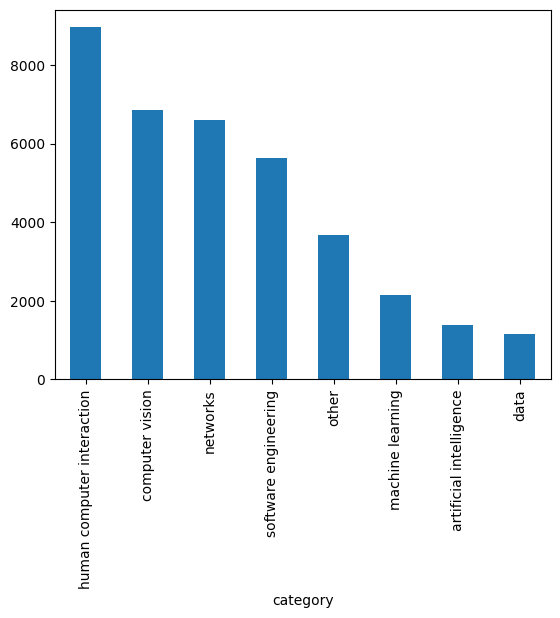

In [23]:
categories = {
    "artificial intelligence" : ["artifici","intellig", "theori", "electron"],
    "computer vision": ["comput", "imag","ieee", "manag", "design", "vision", "recognit", "pattern"],
    "data" : ["data", "analysi", "transact"],
    "human computer interaction": ["communic","robot", "scienc", "human", "sensor"],
    "machine learning": ["model","mathemat", "language", "logic", "algorithm", "learn"],
    "networks": ["network", "system", "process", "secur","wireless","cybernet"],
    "software engineering": ["engin", "technolog", "applic", "softwar", "program", "informat"]
}

# create a new column for each category if abstract contains the category
corpus["category"] = ""

for category, keywords in categories.items():
    for keyword in keywords:
        corpus.loc[corpus['venue'].str.contains(keyword), "category"] = category

# replace empty category with "other"
corpus["category"].replace("", "other", inplace=True)

corpus["category"].value_counts().sum()
corpus["category"].value_counts().plot(kind='bar')


In [24]:
## classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

result = {
    "model": [],
    "accuracy": []
}

X_train, X_test, y_train, y_test = train_test_split(corpus['abstract'], corpus['category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

result["model"].append("MultinomialNB")
result["accuracy"].append(accuracy_score(y_test, y_pred))

#clf = SVC()
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#
#result["model"].append("SVC")
#result["accuracy"].append(accuracy_score(y_test, y_pred))

In [25]:
print(result)

{'model': ['MultinomialNB'], 'accuracy': [0.35505556317739057]}


In [69]:
from random import randint
    
G = nx.Graph()
NB_NODES = 100

for index, row in corpus.iterrows():
    if row['references'] and type(row['references']) == list:
        G.add_node(row['id'])
        G.add_edges_from(itertools.product([row['id']], row['references']))
        nx.set_node_attributes(G, {"id": row['id'], "category": row['category']})

nodes_to_keep = list(G.nodes())[:NB_NODES]
G_filtered = G.subgraph(nodes_to_keep)
print(G.nodes[1]["id"])
colors = []

for i in range(len(corpus['category'].unique())):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

# create a color map for the nodes
color_map = []
for node in G_filtered:
    color_map.append(colors[list(corpus['category'].unique()).index(G_filtered.nodes[node]["category"])])


pos = nx.spring_layout(G_filtered)
nx.draw(G_filtered, pos, with_labels=False, node_size=8, node_color=color_map, font_size=8)

plt.show()

KeyError: 1

In [36]:
xd = []
for index, row in corpus.iterrows():
   for index2, row2 in corpus.iterrows():
        if "001eef4f-1d00-4ae68b4f-7e66344bbc6ein" in row2['references']:
            xd.append((row['id'], row2['id']))

print(xd)

TypeError: argument of type 'float' is not iterable

In [39]:
xd = corpus["references"].where(corpus["id"] == "001eef4f-1d00-4ae68b4f-7e66344bbc6e")
xd = xd.dropna()
print(xd)

Series([], Name: references, dtype: object)
